# Fun with picture and optimizer

In [11]:
from PIL import Image
import numpy as np

### Open image in python

In [9]:
img = Image.open("/data/pics/x.jpeg").resize((320,180))

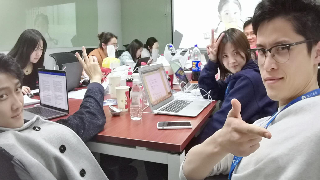

In [10]:
img

### Image in numpy

In [12]:
img_arr = np.array(img)

In [16]:
img_arr

array([[[191, 202, 185],
        [188, 199, 182],
        [187, 198, 181],
        ...,
        [126, 125, 121],
        [124, 124, 116],
        [134, 134, 126]],

       [[190, 201, 184],
        [190, 201, 184],
        [188, 199, 182],
        ...,
        [120, 119, 115],
        [120, 120, 112],
        [127, 127, 119]],

       [[190, 201, 184],
        [190, 201, 184],
        [188, 199, 182],
        ...,
        [104, 103,  99],
        [103, 103,  95],
        [111, 111, 103]],

       ...,

       [[ 68,  63,  67],
        [ 69,  64,  68],
        [ 65,  63,  66],
        ...,
        [140, 141, 136],
        [136, 137, 132],
        [136, 137, 132]],

       [[ 68,  63,  67],
        [ 64,  59,  63],
        [ 63,  61,  64],
        ...,
        [140, 141, 136],
        [136, 137, 132],
        [133, 134, 129]],

       [[ 72,  67,  71],
        [ 70,  65,  69],
        [ 69,  64,  68],
        ...,
        [141, 142, 137],
        [136, 137, 132],
        [136, 137, 132]]

In [17]:
img_arr.shape

(180, 320, 3)

### Open image with pytorch

In [18]:
from torchvision import transforms

#### Transfer from image to tensor

In [36]:
trans = transforms.ToTensor()

In [37]:
img_tensor = trans(img)

In [38]:
img_tensor.size()

torch.Size([3, 180, 320])

In [39]:
img_tensor

tensor([[[ 0.7490,  0.7373,  0.7333,  ...,  0.4941,  0.4863,  0.5255],
         [ 0.7451,  0.7451,  0.7373,  ...,  0.4706,  0.4706,  0.4980],
         [ 0.7451,  0.7451,  0.7373,  ...,  0.4078,  0.4039,  0.4353],
         ...,
         [ 0.2667,  0.2706,  0.2549,  ...,  0.5490,  0.5333,  0.5333],
         [ 0.2667,  0.2510,  0.2471,  ...,  0.5490,  0.5333,  0.5216],
         [ 0.2824,  0.2745,  0.2706,  ...,  0.5529,  0.5333,  0.5333]],

        [[ 0.7922,  0.7804,  0.7765,  ...,  0.4902,  0.4863,  0.5255],
         [ 0.7882,  0.7882,  0.7804,  ...,  0.4667,  0.4706,  0.4980],
         [ 0.7882,  0.7882,  0.7804,  ...,  0.4039,  0.4039,  0.4353],
         ...,
         [ 0.2471,  0.2510,  0.2471,  ...,  0.5529,  0.5373,  0.5373],
         [ 0.2471,  0.2314,  0.2392,  ...,  0.5529,  0.5373,  0.5255],
         [ 0.2627,  0.2549,  0.2510,  ...,  0.5569,  0.5373,  0.5373]],

        [[ 0.7255,  0.7137,  0.7098,  ...,  0.4745,  0.4549,  0.4941],
         [ 0.7216,  0.7216,  0.7137,  ...,  0

In [40]:
img_tensor.max(),img_tensor.min()

(tensor(1.), tensor(0.))

#### transfer it back to image

In [41]:
transback = transforms.ToPILImage()

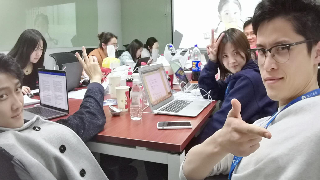

In [42]:
transback(img_tensor)

Element value bigger ==> brighter

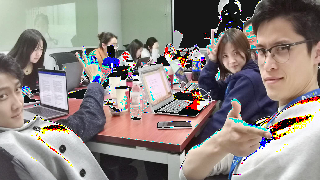

In [43]:
transback(img_tensor*1.1)

Element value smaller ==> dimmer

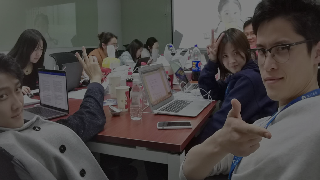

In [45]:
transback(img_tensor*0.5)

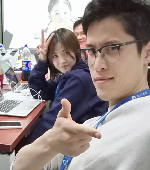

In [47]:
transback(img_tensor[:,:170,170:])

### So that's basicly the play ground, now let's see how we can play it.

In [1029]:
import torch
from torch import nn

In [1030]:
start = torch.FloatTensor(np.ones((3,180,320))/2)


In [1031]:
start.size()

torch.Size([3, 180, 320])

Visualize the start picture

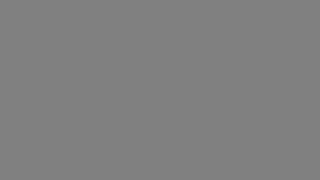

In [1032]:
transback(start)

In [1033]:
start - img_tensor

tensor([[[-0.2490, -0.2373, -0.2333,  ...,  0.0059,  0.0137, -0.0255],
         [-0.2451, -0.2451, -0.2373,  ...,  0.0294,  0.0294,  0.0020],
         [-0.2451, -0.2451, -0.2373,  ...,  0.0922,  0.0961,  0.0647],
         ...,
         [ 0.2333,  0.2294,  0.2451,  ..., -0.0490, -0.0333, -0.0333],
         [ 0.2333,  0.2490,  0.2529,  ..., -0.0490, -0.0333, -0.0216],
         [ 0.2176,  0.2255,  0.2294,  ..., -0.0529, -0.0333, -0.0333]],

        [[-0.2922, -0.2804, -0.2765,  ...,  0.0098,  0.0137, -0.0255],
         [-0.2882, -0.2882, -0.2804,  ...,  0.0333,  0.0294,  0.0020],
         [-0.2882, -0.2882, -0.2804,  ...,  0.0961,  0.0961,  0.0647],
         ...,
         [ 0.2529,  0.2490,  0.2529,  ..., -0.0529, -0.0373, -0.0373],
         [ 0.2529,  0.2686,  0.2608,  ..., -0.0529, -0.0373, -0.0255],
         [ 0.2373,  0.2451,  0.2490,  ..., -0.0569, -0.0373, -0.0373]],

        [[-0.2255, -0.2137, -0.2098,  ...,  0.0255,  0.0451,  0.0059],
         [-0.2216, -0.2216, -0.2137,  ...,  0

In [1034]:
torch.abs(start - img_tensor)

tensor([[[ 0.2490,  0.2373,  0.2333,  ...,  0.0059,  0.0137,  0.0255],
         [ 0.2451,  0.2451,  0.2373,  ...,  0.0294,  0.0294,  0.0020],
         [ 0.2451,  0.2451,  0.2373,  ...,  0.0922,  0.0961,  0.0647],
         ...,
         [ 0.2333,  0.2294,  0.2451,  ...,  0.0490,  0.0333,  0.0333],
         [ 0.2333,  0.2490,  0.2529,  ...,  0.0490,  0.0333,  0.0216],
         [ 0.2176,  0.2255,  0.2294,  ...,  0.0529,  0.0333,  0.0333]],

        [[ 0.2922,  0.2804,  0.2765,  ...,  0.0098,  0.0137,  0.0255],
         [ 0.2882,  0.2882,  0.2804,  ...,  0.0333,  0.0294,  0.0020],
         [ 0.2882,  0.2882,  0.2804,  ...,  0.0961,  0.0961,  0.0647],
         ...,
         [ 0.2529,  0.2490,  0.2529,  ...,  0.0529,  0.0373,  0.0373],
         [ 0.2529,  0.2686,  0.2608,  ...,  0.0529,  0.0373,  0.0255],
         [ 0.2373,  0.2451,  0.2490,  ...,  0.0569,  0.0373,  0.0373]],

        [[ 0.2255,  0.2137,  0.2098,  ...,  0.0255,  0.0451,  0.0059],
         [ 0.2216,  0.2216,  0.2137,  ...,  0

In [1035]:
start_param = nn.Parameter(start)

In [1036]:
loss = torch.abs(start_param - img_tensor).mean()
loss

tensor(0.2287)

In [1037]:
loss.backward()

In [1038]:
start_param.grad

tensor(1.00000e-06 *
       [[[-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870, -5.7870],
         [-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870,  5.7870],
         [-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870,  5.7870],
         ...,
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870],
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870],
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870]],

        [[-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870, -5.7870],
         [-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870,  5.7870],
         [-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870,  5.7870],
         ...,
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870],
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870],
         [ 5.7870,  5.7870,  5.7870,  ..., -5.7870, -5.7870, -5.7870]],

        [[-5.7870, -5.7870, -5.7870,  ...,  5.7870,  5.7870,  5.7870],
         [-5.7870, -5.78

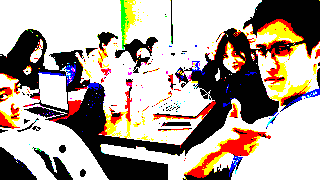

In [1039]:
transback(start_param.grad*678)

In [1238]:
def step(start_param):
    start_param.grad = None
    loss = torch.abs(start_param - img_tensor).mean()
    print(loss.item())
    loss.backward()
    
    start_param.data -= start_param.grad*1000
    return start_param

### Repeat the following step!

In [ ]:
start_param = step(start_param)
transback(start_param)